PART I : Clustering

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%pylab inline

plt.rcParams['figure.figsize'] = (15, 7)
qback = pd.read_csv("QBStats_all.csv",sep=',')

Populating the interactive namespace from numpy and matplotlib


* Quarterback Name (qb)
* Attempts (att)
* Completions (cmp)
* Yards (yds)
* Yards per Attempt (ypa)
* Touchdowns (td)
* Interceptions (int)
* Sacks (sack)
* Loss of Yards (loss)
* The NFL's Quarterback Rating for the game (rate)
* Total points scored in the game (game_points)
* Home or Away Game (home_away)
* Year (year)

In [7]:
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import AgglomerativeClustering

In [9]:
plt.figure(figsize=(15,7))
%matplotlib inline

In [10]:
qback = pd.read_csv("QBStats_all.csv",sep=',')

In [11]:
qback.fillna(0, inplace=True)
qback.head(25)

,qb,att,cmp,yds,ypa,td,int,sack,loss,rate,game_points,home_away,year
0,Boomer EsiasonB. Esiason,38,25,237.0,6.2,0,0.0,2.0,11.0,82.9,13,away,1996
1,Jim HarbaughJ. Harbaugh,25,16,196.0,7.8,2,1.0,0.0,0.0,98.1,20,home,1996
2,Paul JustinP. Justin,8,5,53.0,6.6,0,0.0,1.0,11.0,81.8,20,home,1996
3,Jeff GeorgeJ. George,35,16,215.0,6.1,0,0.0,7.0,53.0,65.8,6,away,1996
4,Kerry CollinsK. Collins,31,17,198.0,6.4,2,0.0,4.0,12.0,95.9,29,home,1996
5,Jeff BlakeJ. Blake,40,23,226.0,5.7,1,2.0,3.0,21.0,61.0,16,away,1996
6,Steve WalshS. Walsh,35,13,154.0,4.4,0,1.0,2.0,15.0,39.5,26,home,1996
7,Scott MitchellS. Mitchell,41,20,260.0,6.3,1,4.0,3.0,8.0,37.7,13,away,1996
8,Mark RoyalsM. Royals,1,1,-8.0,-8.0,0,0.0,0.0,0.0,79.2,13,away,1996
9,Brad JohnsonB. Johnson,23,16,157.0,6.8,1,0.0,1.0,7.0,103.0,17,home,1996


In [12]:
qback['home_away'] = qback['home_away'].map({'home': 1, 'away': 0})

In [13]:
qback.head()
qback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13188 entries, 0 to 13187
Data columns (total 13 columns):
qb             13188 non-null object
att            13188 non-null int64
cmp            13188 non-null int64
yds            13188 non-null float64
ypa            13188 non-null float64
td             13188 non-null int64
int            13188 non-null float64
sack           13188 non-null float64
loss           13188 non-null float64
rate           13188 non-null float64
game_points    13188 non-null int64
home_away      13188 non-null int64
year           13188 non-null int64
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


In [14]:
qback.isnull().sum()

qb             0
att            0
cmp            0
yds            0
ypa            0
td             0
int            0
sack           0
loss           0
rate           0
game_points    0
home_away      0
year           0
dtype: int64

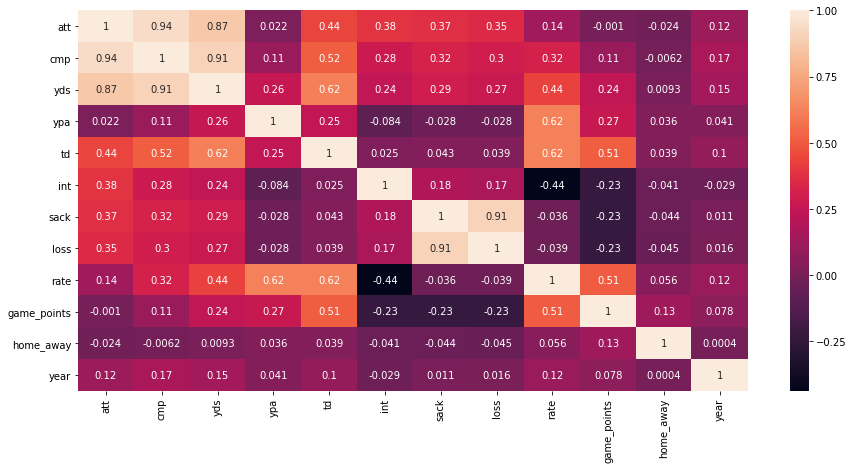

In [15]:
#plotting heatmap to check for the variables with linear relation
plt.figure(figsize=(15,7))
corr=qback.corr()
sns.heatmap(corr,annot=True)

Hierarchical clustering

In [16]:
#selecting the variables

X = qback.ix[:, ("att", "cmp")].values
y = qback.ix[:,("home_away")].values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


[]

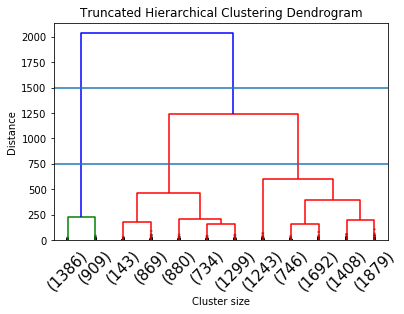

In [17]:
#calling the clustering function
Z = linkage(X,"ward")

#generating dendrogram
dendrogram(Z, truncate_mode="lastp", p=12, leaf_rotation=45,leaf_font_size=15.,show_contracted=True)

plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster size")
plt.ylabel("Distance")

plt.axhline(y=1500)
plt.axhline(y=750)

plt.plot()

In [18]:
#number of cluster based on y = 1500
k = 2

#selecting distance matrix and linkage parameters
Hclustering = AgglomerativeClustering(n_clusters=k, affinity="euclidean",linkage="ward")

#fitting the model on our data
Hclustering.fit(X)

#checking the accuracy of our model
skm.accuracy_score(y, Hclustering.labels_)

0.50166818319684559

In [19]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity="euclidean",linkage="complete")
Hclustering.fit(X)
skm.accuracy_score(y, Hclustering.labels_)

0.51031240521686383

In [20]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity="manhattan",linkage="average")
Hclustering.fit(X)
skm.accuracy_score(y, Hclustering.labels_)

0.49719441916894147

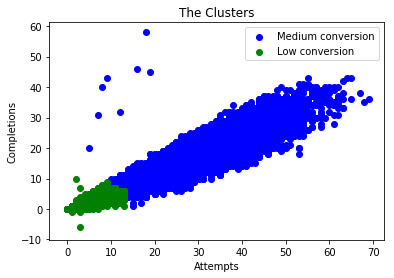

In [21]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#display the clusters

plt.scatter(X[y_hc == 0,0], X[y_hc ==0, 1], c = 'blue', label = 'Medium conversion')
plt.scatter(X[y_hc == 1,0], X[y_hc ==1, 1], c = 'green', label = 'Low conversion')
#plt.scatter(X[y_hc == 2,0], X[y_hc ==2, 1], c = 'red', label = 'High conversion')

plt.title('The Clusters')
plt.xlabel('Attempts')
plt.ylabel('Completions')
plt.legend()
plt.show()

K means clustering

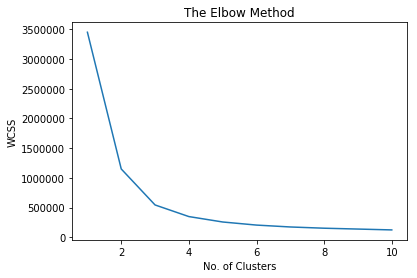

In [22]:
#the Elbow method to get a value of K
#WCSS (within-cluster sums of squares)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    #inertia - sum of squares within clusters
plt.plot(range(1,11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

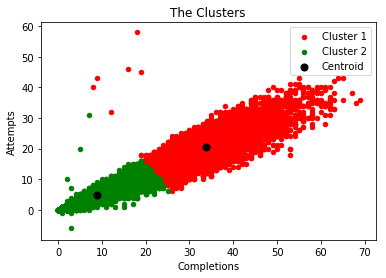

In [23]:
kmeans = KMeans(n_clusters=2, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#display the clusters

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1, 1], s = 20, c = 'green', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2, 1], s = 20, c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50 , c = 'black', label = 'Centroid')
plt.title('The Clusters')
plt.xlabel('Completions')
plt.ylabel('Attempts')
plt.legend()
plt.show()

In [24]:
#checking accuracy of the model
print(classification_report(y, y_kmeans))

             precision    recall  f1-score   support

          0       0.50      0.72      0.59      6559
          1       0.51      0.28      0.36      6629

avg / total       0.50      0.50      0.48     13188



Precision: measure of model's relevancy
Recall: measure of model's completeness

The clusters generated by both the methods are pretty identical

The cluster shows some interesting groupings

PART II : Linear Regression

In [25]:
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import scale
from collections import Counter
from scipy import stats
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import linear_model, datasets
plt.rcParams['figure.figsize'] = (15, 7)
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
qback = pd.read_csv("QBStats_all.csv",sep=',')
qback['home_away'] = qback['home_away'].map({'home': 1, 'away': 0})
qback.fillna(0, inplace=True)
qback.head()

,qb,att,cmp,yds,ypa,td,int,sack,loss,rate,game_points,home_away,year
0,Boomer EsiasonB. Esiason,38,25,237.0,6.2,0,0.0,2.0,11.0,82.9,13,0,1996
1,Jim HarbaughJ. Harbaugh,25,16,196.0,7.8,2,1.0,0.0,0.0,98.1,20,1,1996
2,Paul JustinP. Justin,8,5,53.0,6.6,0,0.0,1.0,11.0,81.8,20,1,1996
3,Jeff GeorgeJ. George,35,16,215.0,6.1,0,0.0,7.0,53.0,65.8,6,0,1996
4,Kerry CollinsK. Collins,31,17,198.0,6.4,2,0.0,4.0,12.0,95.9,29,1,1996


In [27]:
qback.corr()

,att,cmp,yds,ypa,td,int,sack,loss,rate,game_points,home_away,year
att,1.000000,0.939638,0.869236,0.022253,0.438812,0.383048,0.374867,0.351187,0.136832,-0.001041,-0.023886,0.119987
cmp,0.939638,1.000000,0.908164,0.114146,0.515727,0.280330,0.323591,0.301708,0.316401,0.113144,-0.006244,0.168255
yds,0.869236,0.908164,1.000000,0.262215,0.618155,0.244044,0.292800,0.273972,0.437355,0.244286,0.009315,0.150200
ypa,0.022253,0.114146,0.262215,1.000000,0.251290,-0.084231,-0.028345,-0.027716,0.620223,0.268229,0.036240,0.040850
td,0.438812,0.515727,0.618155,0.251290,1.000000,0.025009,0.042596,0.038859,0.620692,0.514046,0.039398,0.099824
int,0.383048,0.280330,0.244044,-0.084231,0.025009,1.000000,0.182228,0.174565,-0.437385,-0.227021,-0.040807,-0.028748
sack,0.374867,0.323591,0.292800,-0.028345,0.042596,0.182228,1.000000,0.907027,-0.035778,-0.231584,-0.044093,0.010825
loss,0.351187,0.301708,0.273972,-0.027716,0.038859,0.174565,0.907027,1.000000,-0.038520,-0.227068,-0.045003,0.016189
rate,0.136832,0.316401,0.437355,0.620223,0.620692,-0.437385,-0.035778,-0.038520,1.000000,0.510014,0.056065,0.115377
game_points,-0.001041,0.113144,0.244286,0.268229,0.514046,-0.227021,-0.231584,-0.227068,0.510014,1.000000,0.132742,0.078378


In [28]:
#dividing data into test and train
train = qback.sample(frac = 0.8, random_state=200)
test = qback.drop(train.index)
train.head()

,qb,att,cmp,yds,ypa,td,int,sack,loss,rate,game_points,home_away,year
528,Todd CollinsT. Collins,7,4,46.0,6.6,1,1.0,3.0,15.0,77.1,18,0,1996
13049,Matt RyanM. Ryan,28,18,237.0,8.5,3,0.0,2.0,17.0,126.6,42,0,2016
9192,Matt CasselM. Cassel,26,14,152.0,5.8,1,0.0,3.0,12.0,84.1,13,1,2010
1573,Peyton ManningP. Manning,42,22,140.0,3.3,1,2.0,0.0,0.0,47.7,14,0,1998
8231,Peyton ManningP. Manning,7,7,95.0,13.6,1,0.0,1.0,4.0,158.3,23,1,2008


In [29]:
#selecting training data
X = train[["att","yds"]]
y = train[["cmp"]]

model = linear_model.LinearRegression()
results = model.fit(X,y)

print (results.intercept_, results.coef_)

[-0.34081157] [[ 0.3957456  0.0313247]]


In [30]:
#selecting testing data
x_test = test[["att","yds"]]
y_test = test[["cmp"]]

In [31]:
#predicting the target variable
y_pred = results.predict(x_test)
y_pred

array([[  4.48536216],
       [ 20.24509424],
       [ 22.56839389],
       ..., 
       [ 25.54424015],
       [ 24.35079993],
       [ 16.79720719]])

In [32]:
#calculation of root mean square error
rmse = np.sqrt(skm.mean_squared_error(y_test, y_pred))
rmse/y_test.mean()*100

cmp    15.827197
dtype: float64

Text(0.5,1,'Ridge Regression')

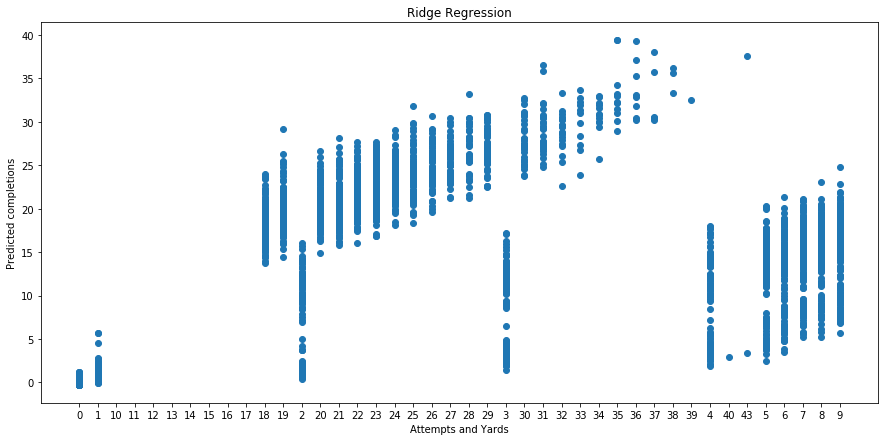

In [33]:
#using Ridge to linearize our model as it is multiple regression
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X,y)
y_pred_ridge = ridge.predict(x_test)

plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Attempts and Yards")
plt.ylabel("Predicted completions")
plt.title("Ridge Regression")

In [34]:
rmse = np.sqrt(skm.mean_squared_error(y_test, y_pred_ridge))
rmse/y_test.mean()

cmp    0.158272
dtype: float64

Here we can see that, rmse value is less that that of rmse calculated using Ridge

In [35]:
q_data = qback.ix[:,(1,3)].values
q_target = qback.ix[:,2].values
q_data_name = ["att","yds"]
X,y = scale(q_data),q_target

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [36]:
LinReg = LinearRegression(normalize = True)
LinReg.fit(X,y)
print (LinReg.score(X,y))

0.917094789354


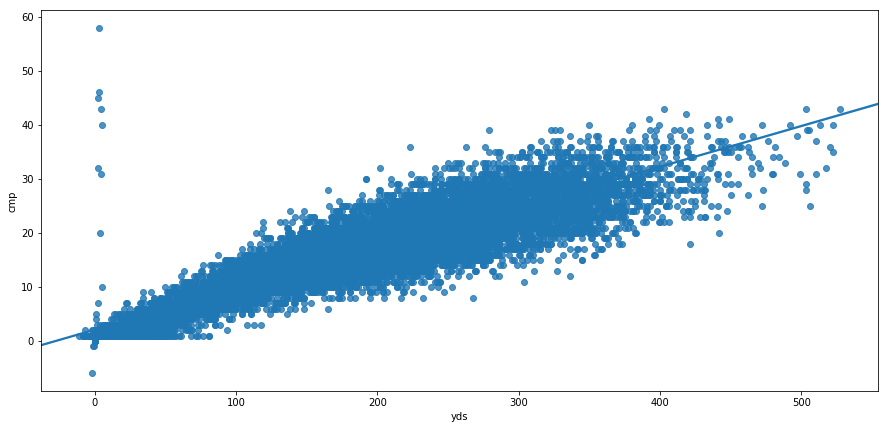

In [37]:
sns.regplot(x="yds", y="cmp", data=qback)

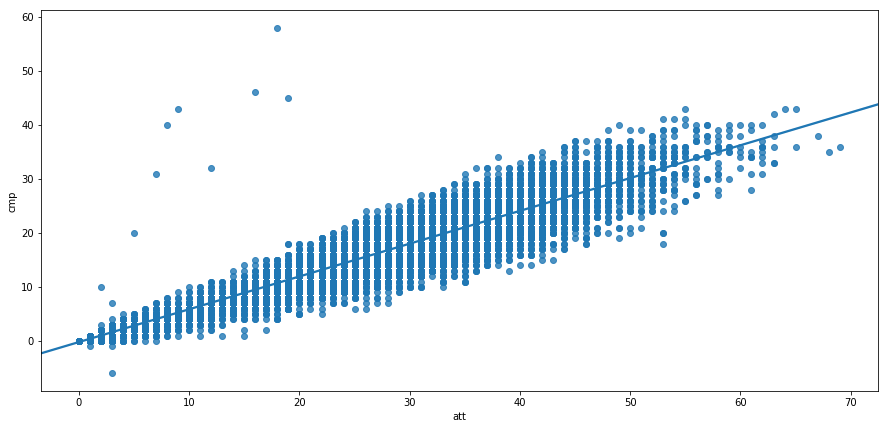

In [38]:
sns.regplot(x="att", y="cmp", data=qback)

In [39]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     1748.
Date:                Tue, 20 Feb 2018   Prob (F-statistic):               0.00
Time:                        14:16:06   Log-Likelihood:                -55538.
No. Observations:               13188   AIC:                         1.111e+05
Df Residuals:                   13186   BIC:                         1.111e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.3930      0.287     18.762      0.000       4.830       5.956
x2             3.2810      0.287     11.415      0.000       2.718       3.844
==============================================================================
Omnibus:                     7589.827   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           556364.297
Skew:                           1.948   Prob(JB):                         0.00
Kurtosis:                      34.580   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
y_pred = results.predict(X)
y_pred

array([  5.99872612,  -0.43620689, -11.62764237, ...,   4.26887363,
       -12.76338757,  -1.0371006 ])

In [41]:
#By using ridge regression with varying alpha values we can see that rsmse has been reduced more 
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, x_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60,80,100,120])
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X, y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean()/y.mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean()/y_test.mean())
y_train_rdg = ridge.predict(X)
y_test_rdg = ridge.predict(x_test)

Best alpha : 1.0
Try again for more precision with alphas centered around 1.0
Best alpha : 1.4
Ridge RMSE on Training set : 0.155135935293
Ridge RMSE on Test set : cmp    0.155612
dtype: float64


PART III : Logistic Regression

In [42]:
lqback = qback[["game_points","home_away"]]
lqback

,game_points,home_away
0,13,0
1,20,1
2,20,1
3,6,0
4,29,1
5,16,0
6,26,1
7,13,0
8,13,0
9,17,1


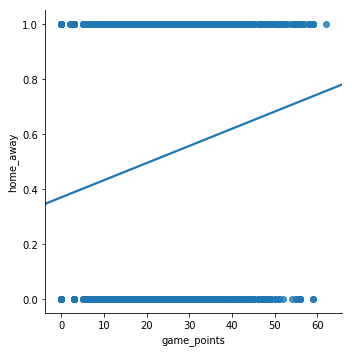

In [43]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.lmplot(x='game_points', y='home_away', data=lqback, ci=None)

In [44]:
win_loss_model = sm.Logit(lqback['home_away'], lqback['game_points']).fit()
win_loss_model.summary()

Optimization terminated successfully.
         Current function value: 0.691097
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              home_away   No. Observations:                13188
Model:                          Logit   Df Residuals:                    13187
Method:                           MLE   Df Model:                            0
Date:                Tue, 20 Feb 2018   Pseudo R-squ.:                0.002938
Time:                        14:16:14   Log-Likelihood:                -9114.2
converged:                       True   LL-Null:                       -9141.0
                                        LLR p-value:                       nan
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
game_points     0.0054      0.001      7.340      0.000       0.004       0.007
===============================================================================
"""

In [45]:
train = qback.sample(frac = 0.8, random_state=200)
test = qback.drop(train.index)
train.head()

X = train[["game_points"]]
y = train["home_away"]


x_test = test[["game_points"]]
y_test = test[["home_away"]]

# setting Logistic regression classifier
# scikit-learn includes the intercept.
# Inverse of regularization strength

lr = LogisticRegression(C=1)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

y_test_pred=LRm.predict_proba(X_test)  # The returned estimates for all classes are ordered by the label of classes.

In [46]:
print (X_test.shape)
print (y_test.shape)

(2110, 1)
(2110,)


In [47]:
y_test_pred

array([[ 0.57286435,  0.42713565],
       [ 0.55309995,  0.44690005],
       [ 0.63676696,  0.36323304],
       ..., 
       [ 0.59239881,  0.40760119],
       [ 0.36274945,  0.63725055],
       [ 0.42008612,  0.57991388]])

In [48]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %skm.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.554028436019


In [49]:
LRm.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

In [50]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %skm.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.554028436019
